,Time,Conductivity,Temperature,Pressure,Temperature.1,Dissolved O2 concentration,Sea pressure,Depth,Salinity,Speed of sound,Specific conductivity,Dissolved O2 saturation,Density anomaly
0,2025-05-30 11:03:47.250,33.388176,11.360168,11.634559,11.846700,342.401581,1.502059,1.489810,29.128162,1487.603027,45150.933594,120.493973,22.152794
1,2025-05-30 11:03:47.500,33.381020,11.234222,11.710971,11.846700,342.134644,1.578471,1.565599,29.220711,1487.269897,45288.582031,120.144745,22.246688
2,2025-05-30 11:03:47.750,33.393353,11.216949,11.710020,11.846700,342.069855,1.577520,1.564656,29.246361,1487.239624,45325.597656,120.096832,22.269567
3,2025-05-30 11:03:48.000,33.402256,11.244629,11.675004,11.608200,337.676605,1.542504,1.529926,29.233068,1487.321289,45305.179688,118.615082,22.254334
4,2025-05-30 11:03:48.250,33.406883,11.338745,11.660337,11.608200,337.875305,1.527838,1.515379,29.163134,1487.569580,45201.238281,118.872696,22.183758
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3435,2025-05-30 11:18:06.000,0.001306,13.365448,10.231471,13.617599,343.758148,0.098971,0.098164,0.007069,1460.109497,1.679543,105.310532,-0.662334
3436,2025-05-30 11:18:06.250,0.001175,13.374786,10.233823,13.617599,343.758209,0.101323,0.100497,0.007039,1460.143433,1.509735,105.332413,-0.663572
3437,2025-05-30 12:23:02.250,32.486729,13.025696,10.791176,13.801499,361.539032,0.658676,0.653305,27.030716,1490.870117,42119.949219,130.081787,20.226702
3438,2025-05-30 12:23:02.500,32.498116,13.063019,10.796911,13.801499,361.593964,0.664412,0.658993,27.014639,1490.978271,42095.804688,130.190414,20.207383


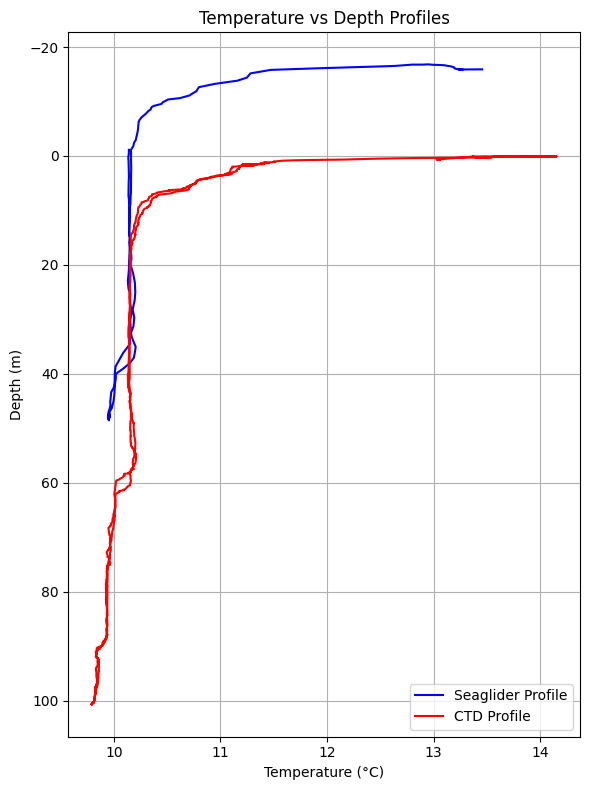

In [9]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

sg = xr.open_dataset('p1940001.nc', decode_timedelta = True)

temp_sg = sg['temperature'] 
depth_sg = sg['depth'] 

# Convert to 1D arrays 
temp_vals = temp_sg.values
depth_vals = depth_sg.values

ctd = pd.read_excel('RBR_05302025_Edmonds.xlsx', sheet_name='Data', header = 1)

# Slice first profile (rows 0 to 3439)
ctd_profile1 = ctd.iloc[:3440]
display(ctd_profile1)


depth_ctd = ctd_profile1['Depth']         
temp_ctd = ctd_profile1['Temperature']    

# === Plot both profiles ===
plt.figure(figsize=(6, 8))

plt.plot(temp_vals, depth_vals, label='Seaglider Profile', color='blue')
plt.plot(temp_ctd, depth_ctd, label='CTD Profile', color='red')
 
plt.gca().invert_yaxis()  # Depth increasing downward
plt.xlabel('Temperature (°C)')
plt.ylabel('Depth (m)')
plt.title('Temperature vs Depth Profiles')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()